In [1]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('drugsComTrain_raw.csv', sep=',')

In [3]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
df.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [5]:
len(df.drugName.value_counts())

3436

In [6]:
df.shape

(161297, 7)

In [7]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')| (df['condition']=='Pain')|(df['condition']=='Insomnia')|(df['condition']=='Anxiety')|(df['condition']=='Weight Loss')|(df['condition']=='Obesity')|(df['condition']=='ADHD')|(df['condition']=='Chronic Pain')|(df['condition']=='Bipolar Disorde')|(df['condition']=='Emergency Contraception')|(df['condition']=='Acne')|(df['condition']=='Vaginal Yeast Infection')]

In [8]:
df_train.shape

(85018, 7)

In [9]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32


In [10]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [11]:
X.head()

,condition,review
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
6,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."


In [12]:
X.condition.value_counts()

Birth Control              28788
Depression                  9069
Pain                        6145
Anxiety                     5904
Acne                        5588
Bipolar Disorde             4224
Insomnia                    3673
Weight Loss                 3609
Obesity                     3568
ADHD                        3383
Diabetes, Type 2            2554
Emergency Contraception     2463
High Blood Pressure         2321
Vaginal Yeast Infection     2274
Chronic Pain                1455
Name: condition, dtype: int64

In [13]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [14]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [15]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\khkir\AppData\Local\Temp/ipykernel_11248/999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [16]:
X.head()

,condition,review
1,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
6,Emergency Contraception,"He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant."
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again. I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."


In [17]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [19]:
from bs4 import BeautifulSoup
import re

In [20]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [21]:
X['review_clean'] = X['review'].apply(review_to_words)

In [22]:
X.head()

,condition,review,review_clean
1,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.",son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
6,Emergency Contraception,"He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.",pulled cummed bit took plan b hour later took pregnancy test two week later pregnant
7,Bipolar Disorde,"Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden 

In [23]:
X_feat=X['review_clean']
y=X['condition']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,test_size=0.2, random_state=0)

In [25]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [27]:
labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia']

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.svm import SVC

accuracy:   0.849
Confusion matrix, without normalization


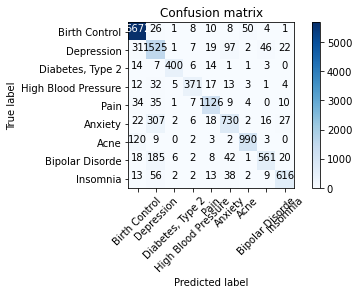

In [31]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [32]:
mnb_out = open('mnb.pkl','wb')
pickle.dump(mnb,mnb_out)
mnb_out.close()

accuracy:   0.866
Confusion matrix, without normalization


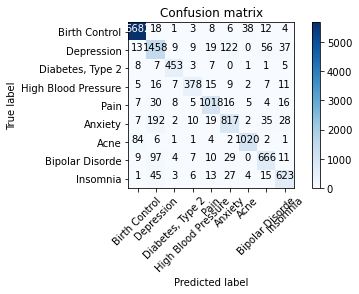

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [34]:
passive_out = open('passive.pkl','wb')
pickle.dump(passive,passive_out)
passive_out.close()

accuracy:   0.840
Confusion matrix, without normalization


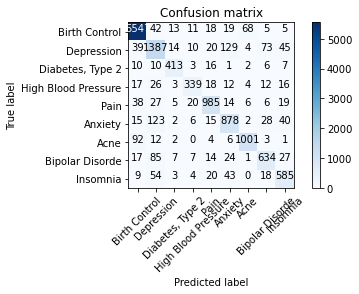

In [35]:
dc = DecisionTreeClassifier()
dc.fit(count_train, y_train)
pred = dc.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [36]:
dc_out = open('dc.pkl','wb')
pickle.dump(dc,dc_out)
dc_out.close()

accuracy:   0.891
Confusion matrix, without normalization


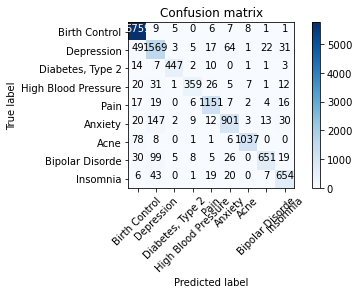

In [37]:
rf= RandomForestClassifier()
rf.fit(count_train, y_train)
pred = rf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [38]:
rf_out = open('rf.pkl','wb')
pickle.dump(rf,rf_out)
rf_out.close()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

accuracy:   0.679
Confusion matrix, without normalization


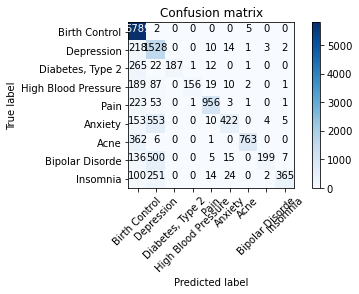

In [41]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [42]:
mnb_tf_out = open('mnb_tf.pkl','wb')
pickle.dump(mnb_tf,mnb_tf_out)
mnb_tf_out.close()

accuracy:   0.883
Confusion matrix, without normalization


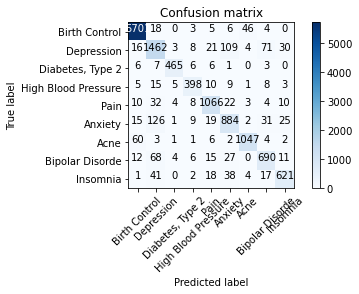

In [43]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [44]:
passive_tf_out = open('passive_tf.pkl','wb')
pickle.dump(pass_tf,passive_tf_out)
passive_tf_out.close()

accuracy:   0.835
Confusion matrix, without normalization


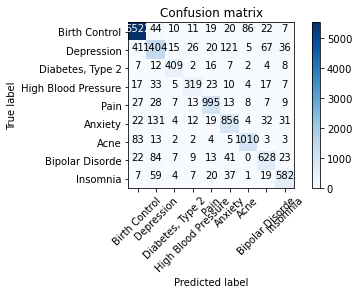

In [45]:
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
#dc_tf= GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dc_tf = DecisionTreeClassifier()
dc_tf.fit(tfidf_train, y_train)
pred = dc_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [46]:
dc_tf_out = open('dc_tf.pkl','wb')
pickle.dump(dc_tf,dc_tf_out)
dc_tf_out.close()

accuracy:   0.891
Confusion matrix, without normalization


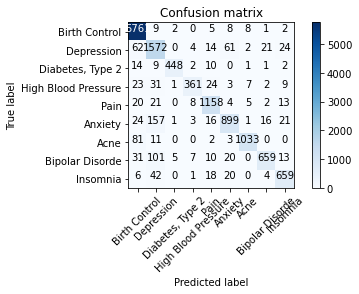

In [47]:
rf_tf = RandomForestClassifier()
rf_tf.fit(tfidf_train, y_train)
pred = rf_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [48]:
rf_tf_out = open('rf_tf.pkl','wb')
pickle.dump(rf_tf,rf_tf_out)
rf_tf_out.close()

In [49]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.916
Confusion matrix, without normalization


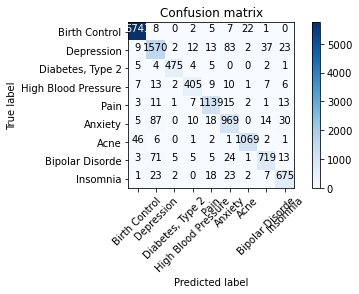

In [50]:
pass_tf1 = PassiveAggressiveClassifier()
pass_tf1.fit(tfidf_train_2, y_train)
pred = pass_tf1.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [51]:
pass_tf1_out = open('pass_tf1.pkl','wb')
pickle.dump(pass_tf1,pass_tf1_out)
pass_tf1_out.close()

In [52]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

accuracy:   0.918
Confusion matrix, without normalization


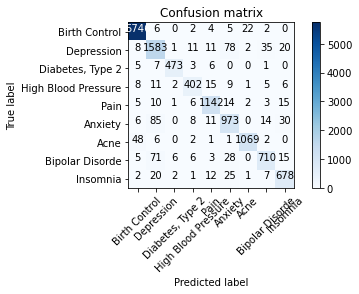

In [53]:
pass_tf2 = PassiveAggressiveClassifier()
pass_tf2.fit(tfidf_train_3, y_train)
pred = pass_tf2.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred,labels=labels)
plot_confusion_matrix(cm, classes=labels)

In [54]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [55]:
df[df['condition']=='Birth Control']

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.""",8,8-Dec-16,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed.""",3,7-Aug-14,10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free sex. The only thing is that my periods are sometimes light and sometimes heavy. Sometimes they go away and sometimes they show up unexpected. I also feel somewhat depressed. Not sure if its Nexplanon or not. I&#039;ve had Nexplanont for about 2 months now, but despite the side effects its the most effective birth control I&#039;ve ever used and I do not plan on taking it out.""",9,11-Aug-14,11
...,...,...,...,...,...,...,...
161268,76151,Portia,Birth Control,"""I switched to Portia 12 days ago when I started spotting from another birth control (Alesse). I just wanted to say I started taking Portia on Tuesday and have been crying for consecutive days from Friday to Tuesday out of no where. I have also found it very hard to get studying and made me a much lazier person. I will be discontinuing this birth control today because my mood swings were affecting me too much.""",1,28-Jan-14,9

In [56]:
text =["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'